In [542]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [608]:
file = "TIPS.xlsx"
sixteendata = pd.read_excel(file, sheet_name="2016")
seventeendata = pd.read_excel(file, sheet_name="2017")
eighteendata = pd.read_excel(file, sheet_name="2018")
nineteendata = pd.read_excel(file, sheet_name="2019")
twentydata = pd.read_excel(file, sheet_name="2020")
twentyonedata = pd.read_excel(file, sheet_name="2021")
twentytwodata = pd.read_excel(file, sheet_name="2022")

In [544]:
data = pd.concat([sixteendata["TIP #1"],sixteendata["TIP #2"],sixteendata["TIP #3"],sixteendata["Anything else you want to mention?"],seventeendata["TIP #1"],seventeendata["TIP #2"],seventeendata["TIP #3"],seventeendata["Anything else you want to mention?"],eighteendata["TIP #1"],eighteendata["TIP #2"],eighteendata["TIP #3"],eighteendata["Anything else you want to mention?"],nineteendata["TIP #1"],nineteendata["TIP #2"],nineteendata["TIP #3"],nineteendata["Anything else you want to mention?"],twentydata["TIP #1"],twentydata["TIP #2"],twentydata["TIP #3"],twentydata["Anything else you want to mention? [this can be more TIPS if you are overflowing with advice]"],twentyonedata["TIP #1"],twentyonedata["TIP #2"],twentyonedata["TIP #3"],twentyonedata["Anything else you want to mention? [this can be more TIPS if you are overflowing with advice]"],twentytwodata["TIP #1"],twentytwodata["TIP #2"],twentytwodata["TIP #3"],twentytwodata["Anything else you want to mention? [this can be more TIPS if you are overflowing with advice]"]],ignore_index=True,axis=0)

In [606]:
data = data.dropna()
data

0       If you are an international student provide OI...
1                  Apply to jobs online over winter break
2       When looking for jobs, make sure to emphasize ...
3       Everyone here has worked hard and deserves to ...
4       It's summer. You're about to think you're busy...
                              ...                        
1628    This program will take as much time from you a...
1629    I am sad to see this amazing year come to an e...
1632    Work hard, don't forget to have fun, and cheri...
1634    For those who love nature, go kayaking with fr...
1635    The days are long, but the year is short. Enjo...
Length: 1177, dtype: object

In [546]:
tips = []
for row in data:
        tips.append(row)

In [547]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(tips)

In [548]:
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Garrett\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Garrett\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [549]:
terms = vectorizer.get_feature_names()
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

C:\Users\Garrett\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [550]:
print("Top terms per cluster:")
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 learn
 don
 python
 notes
 work
 try
 job
 start
 interviews
 interview
 use
 learning
 class
 practicum
 good
Cluster 1:
 time
 program
 make
 classmates
 know
 friends
 fun
 work
 outside
 sure
 people
 team
 enjoy
 don
 ll
Cluster 2:
 trust
 process
 faculty
 help
 ask
 staff
 don
 job
 afraid
 questions
 willing
 year
 iaa
 want
 know


In [551]:
cloud1 = []
for ind in order_centroids[0, :45]:
        cloud1.append(terms[ind])
cloud1

['learn',
 'don',
 'python',
 'notes',
 'work',
 'try',
 'job',
 'start',
 'interviews',
 'interview',
 'use',
 'learning',
 'class',
 'practicum',
 'good',
 'program',
 'early',
 'people',
 'focus',
 'like',
 'really',
 'come',
 'just',
 'team',
 'season',
 'time',
 'hard',
 'summer',
 'code',
 'experience',
 'best',
 'lot',
 'feel',
 'different',
 'companies',
 'project',
 'want',
 'help',
 'fall',
 'open',
 'assignments',
 'possible',
 'make',
 'great',
 'end']

In [552]:
cloud2 = []
for ind in order_centroids[1, :45]:
        cloud2.append(terms[ind])
cloud2

['time',
 'program',
 'make',
 'classmates',
 'know',
 'friends',
 'fun',
 'work',
 'outside',
 'sure',
 'people',
 'team',
 'enjoy',
 'don',
 'll',
 'things',
 'teammates',
 'fall',
 'important',
 'hang',
 'going',
 'social',
 'practicum',
 'good',
 'really',
 'lot',
 'help',
 'life',
 'relationships',
 'spend',
 'try',
 'iaa',
 'events',
 'school',
 'experience',
 'great',
 'goes',
 'year',
 'doing',
 'best',
 'just',
 'homework',
 'teams',
 'break',
 'support']

In [553]:
cloud3 = []
for ind in order_centroids[2, :45]:
        cloud3.append(terms[ind])
cloud3

['trust',
 'process',
 'faculty',
 'help',
 'ask',
 'staff',
 'don',
 'job',
 'afraid',
 'questions',
 'willing',
 'year',
 'iaa',
 'want',
 'know',
 'long',
 'short',
 'resources',
 'calendar',
 'really',
 'students',
 'teammates',
 'll',
 'classmates',
 'talk',
 'program',
 'try',
 'days',
 'doing',
 'search',
 'interview',
 'reach',
 'patient',
 'best',
 'time',
 'peers',
 'april',
 'people',
 'enjoy',
 'hard',
 'need',
 'understand',
 'advice',
 'work',
 'come']

In [554]:
cloud1 = [x for x in cloud1 if x not in stopwords.words('english')]
cloud1

['learn',
 'python',
 'notes',
 'work',
 'try',
 'job',
 'start',
 'interviews',
 'interview',
 'use',
 'learning',
 'class',
 'practicum',
 'good',
 'program',
 'early',
 'people',
 'focus',
 'like',
 'really',
 'come',
 'team',
 'season',
 'time',
 'hard',
 'summer',
 'code',
 'experience',
 'best',
 'lot',
 'feel',
 'different',
 'companies',
 'project',
 'want',
 'help',
 'fall',
 'open',
 'assignments',
 'possible',
 'make',
 'great',
 'end']

In [555]:
cloud2 = [x for x in cloud2 if x not in stopwords.words('english')]
cloud2

['time',
 'program',
 'make',
 'classmates',
 'know',
 'friends',
 'fun',
 'work',
 'outside',
 'sure',
 'people',
 'team',
 'enjoy',
 'things',
 'teammates',
 'fall',
 'important',
 'hang',
 'going',
 'social',
 'practicum',
 'good',
 'really',
 'lot',
 'help',
 'life',
 'relationships',
 'spend',
 'try',
 'iaa',
 'events',
 'school',
 'experience',
 'great',
 'goes',
 'year',
 'best',
 'homework',
 'teams',
 'break',
 'support']

In [556]:
cloud3 = [x for x in cloud3 if x not in stopwords.words('english')]
cloud3

['trust',
 'process',
 'faculty',
 'help',
 'ask',
 'staff',
 'job',
 'afraid',
 'questions',
 'willing',
 'year',
 'iaa',
 'want',
 'know',
 'long',
 'short',
 'resources',
 'calendar',
 'really',
 'students',
 'teammates',
 'classmates',
 'talk',
 'program',
 'try',
 'days',
 'search',
 'interview',
 'reach',
 'patient',
 'best',
 'time',
 'peers',
 'april',
 'people',
 'enjoy',
 'hard',
 'need',
 'understand',
 'advice',
 'work',
 'come']

In [557]:
print(X)

  (0, 2270)	0.22463656615774616
  (0, 1533)	0.21229216000457374
  (0, 174)	0.22463656615774616
  (0, 379)	0.19674004751174518
  (0, 879)	0.22463656615774616
  (0, 2782)	0.0786284753589744
  (0, 2271)	0.22463656615774616
  (0, 2880)	0.4492731323154923
  (0, 1092)	0.17273542246223694
  (0, 1865)	0.21229216000457374
  (0, 1042)	0.21229216000457374
  (0, 77)	0.39348009502349035
  (0, 1846)	0.22463656615774616
  (0, 2118)	0.34017271319364073
  (0, 2621)	0.16329273965469607
  (0, 1412)	0.19674004751174518
  (1, 320)	0.4045192683179448
  (1, 3002)	0.4612075817726475
  (1, 1853)	0.4803956219022487
  (1, 1452)	0.42445181239749685
  (1, 159)	0.4612075817726475
  (2, 1262)	0.15481357897940826
  (2, 2879)	0.2578739241640811
  (2, 1271)	0.3590694902307255
  (2, 2563)	0.30560576441243165
  :	:
  (1175, 1004)	0.1422370411106169
  (1175, 1290)	0.1422370411106169
  (1175, 1121)	0.1422370411106169
  (1175, 1810)	0.1422370411106169
  (1175, 2657)	0.1422370411106169
  (1175, 1473)	0.2844740822212338
  (11

In [558]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
x0
x1

array([-0.00296772,  0.02212285, -0.03001098, ..., -0.03846554,
       -0.00725545, -0.06582539])

In [559]:
clusters = model.labels_

In [560]:
df = pd.DataFrame()
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [561]:
import numpy as np
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
interview,interviews,start,job,try,work,notes,python,don,learn

Cluster 1
sure,outside,work,fun,friends,know,classmates,make,program,time

Cluster 2
questions,afraid,job,don,staff,ask,help,faculty,process,trust


In [562]:
cluster_map = {0: "academics/professional growth", 1: "social life", 2: "resources"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

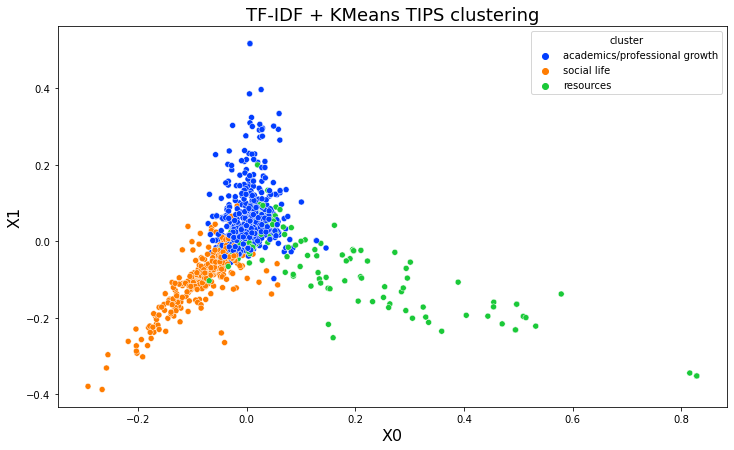

In [563]:
import matplotlib.pyplot as plt
import seaborn as sns
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans TIPS clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="bright")
plt.show()

In [645]:
df['cluster']

0       academics/professional growth
1       academics/professional growth
2       academics/professional growth
3       academics/professional growth
4       academics/professional growth
                    ...              
1172                      social life
1173    academics/professional growth
1174                      social life
1175    academics/professional growth
1176                        resources
Name: cluster, Length: 1177, dtype: object

In [646]:
clustercountdf = pd.DataFrame()
clustercountdf['cluster'] = ["academics/professional growth", "social", "resources"]
clusterlist = df['cluster'].tolist()
clustercountlist = []
acount = clusterlist.count('academics/professional growth')
clustercountlist.append(acount)
scount = clusterlist.count('social life')
clustercountlist.append(scount)
rcount = clusterlist.count('resources')
clustercountlist.append(rcount)
clustercountdf['count'] = clustercountlist
clustercountdf

,cluster,count
0,academics/professional growth,704
1,social,331
2,resources,142


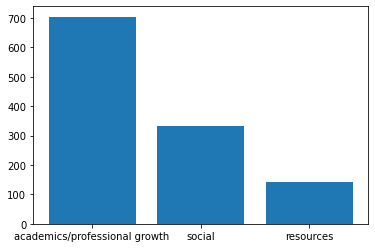

In [647]:
plt.bar(clustercountdf['cluster'],clustercountdf['count'])
plt.show()

In [654]:
sixteendatadf = pd.concat([sixteendata["TIP #1"],sixteendata["TIP #2"],sixteendata["TIP #3"],sixteendata["Anything else you want to mention?"]],ignore_index=True,axis=0)
sixteendatadf = sixteendatadf.dropna()
sixteendatadf = sixteendatadf.reset_index()
sixteendatadf = sixteendatadf.drop(['index'], axis=1)
sixteendatadf = sixteendatadf[0]
sixteenpredictions = []
i=-1
for x in sixteendatadf:
    i=i+1
    Y = vectorizer.transform([sixteendatadf[i]])
    prediction = model.predict(Y)
    sixteenpredictions.append(prediction[0])
sixteenpredictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0]

In [655]:
seventeendatadf = pd.concat([seventeendata["TIP #1"],seventeendata["TIP #2"],seventeendata["TIP #3"],seventeendata["Anything else you want to mention?"]],ignore_index=True,axis=0)
seventeendatadf = seventeendatadf.dropna()
seventeendatadf = seventeendatadf.reset_index()
seventeendatadf = seventeendatadf.drop(['index'], axis=1)
seventeendatadf = seventeendatadf[0]
seventeenpredictions = []
i=-1
for x in seventeendatadf:
    i=i+1
    Y = vectorizer.transform([seventeendatadf[i]])
    prediction = model.predict(Y)
    seventeenpredictions.append(prediction[0])
seventeenpredictions


[0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 0]

In [656]:
eighteendatadf = pd.concat([eighteendata["TIP #1"],eighteendata["TIP #2"],eighteendata["TIP #3"],eighteendata["Anything else you want to mention?"]],ignore_index=True,axis=0)
eighteendatadf = eighteendatadf.dropna()
eighteendatadf = eighteendatadf.reset_index()
eighteendatadf = eighteendatadf.drop(['index'], axis=1)
eighteendatadf = eighteendatadf[0]
eighteenpredictions = []
i=-1
for x in eighteendatadf:
    i=i+1
    Y = vectorizer.transform([eighteendatadf[i]])
    prediction = model.predict(Y)
    eighteenpredictions.append(prediction[0])
eighteenpredictions


[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 0]

In [660]:
nineteendatadf = pd.concat([nineteendata["TIP #1"],nineteendata["TIP #2"],nineteendata["TIP #3"],nineteendata["Anything else you want to mention?"]],ignore_index=True,axis=0)
nineteendatadf = nineteendatadf.dropna()
nineteendatadf = nineteendatadf.reset_index()
nineteendatadf = nineteendatadf.drop(['index'], axis=1)
nineteendatadf = nineteendatadf[0]
nineteenpredictions = []
i=-1
for x in nineteendatadf:
    i=i+1
    Y = vectorizer.transform([nineteendatadf[i]])
    prediction = model.predict(Y)
    nineteenpredictions.append(prediction[0])
nineteenpredictions


[0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 1]

In [662]:
twentydatadf = pd.concat([twentydata["TIP #1"],twentydata["TIP #2"],twentydata["TIP #3"],twentydata["Anything else you want to mention? [this can be more TIPS if you are overflowing with advice]"]],ignore_index=True,axis=0)
twentydatadf = twentydatadf.dropna()
twentydatadf = twentydatadf.reset_index()
twentydatadf = twentydatadf.drop(['index'], axis=1)
twentydatadf = twentydatadf[0]
twentypredictions = []
i=-1
for x in twentydatadf:
    i=i+1
    Y = vectorizer.transform([twentydatadf[i]])
    prediction = model.predict(Y)
    twentypredictions.append(prediction[0])
twentypredictions


[0,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 0]

In [663]:
twentyonedatadf = pd.concat([twentyonedata["TIP #1"],twentyonedata["TIP #2"],twentyonedata["TIP #3"],twentyonedata["Anything else you want to mention? [this can be more TIPS if you are overflowing with advice]"]],ignore_index=True,axis=0)
twentyonedatadf = twentyonedatadf.dropna()
twentyonedatadf = twentyonedatadf.reset_index()
twentyonedatadf = twentyonedatadf.drop(['index'], axis=1)
twentyonedatadf = twentyonedatadf[0]
twentyonepredictions = []
i=-1
for x in twentyonedatadf:
    i=i+1
    Y = vectorizer.transform([twentyonedatadf[i]])
    prediction = model.predict(Y)
    twentyonepredictions.append(prediction[0])
twentyonepredictions


[0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 1]

In [664]:
twentytwodatadf = pd.concat([twentytwodata["TIP #1"],twentytwodata["TIP #2"],twentytwodata["TIP #3"],twentytwodata["Anything else you want to mention? [this can be more TIPS if you are overflowing with advice]"]],ignore_index=True,axis=0)
twentytwodatadf = twentytwodatadf.dropna()
twentytwodatadf = twentytwodatadf.reset_index()
twentytwodatadf = twentytwodatadf.drop(['index'], axis=1)
twentytwodatadf = twentytwodatadf[0]
twentytwopredictions = []
i=-1
for x in twentytwodatadf:
    i=i+1
    Y = vectorizer.transform([twentytwodatadf[i]])
    prediction = model.predict(Y)
    twentytwopredictions.append(prediction[0])
twentytwopredictions


[1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2]

In [678]:
academicsclustercounts=[sixteenpredictions.count(0),seventeenpredictions.count(0),eighteenpredictions.count(0),nineteenpredictions.count(0),twentypredictions.count(0),twentyonepredictions.count(0),twentytwopredictions.count(0)]
socialclustercounts=[sixteenpredictions.count(1),seventeenpredictions.count(1),eighteenpredictions.count(1),nineteenpredictions.count(1),twentypredictions.count(1),twentyonepredictions.count(1),twentytwopredictions.count(1)]
resourcesclustercounts=[sixteenpredictions.count(2),seventeenpredictions.count(2),eighteenpredictions.count(2),nineteenpredictions.count(2),twentypredictions.count(2),twentyonepredictions.count(2),twentytwopredictions.count(2)]

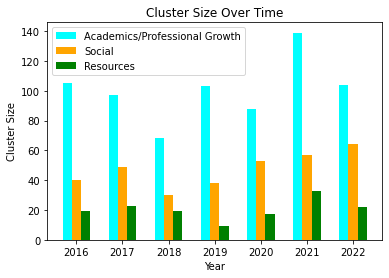

<Figure size 864x504 with 0 Axes>

In [697]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(7)
y1 = academicsclustercounts
y2 = socialclustercounts
y3 = resourcesclustercounts
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['2016', '2017', '2018', '2019', '2020','2021','2022'])
plt.xlabel("Year")
plt.ylabel("Cluster Size")
plt.legend(["Academics/Professional Growth", "Social", "Resources"])
plt.title('Cluster Size Over Time')
plt.figure(figsize=(12, 7))
plt.show()

In [690]:
denominator = [x + y + z for (x, y, z) in zip(academicsclustercounts, socialclustercounts, resourcesclustercounts)]
denominator

[164, 169, 117, 150, 158, 229, 190]

In [693]:
academicpercentages = [i / j for i, j in zip(academicsclustercounts,denominator)]
academicpercentages = [value * 100 for value in academicpercentages]
socialpercentages = [i / j for i, j in zip(socialclustercounts,denominator)]
socialpercentages = [value * 100 for value in socialpercentages]
resourcespercentages = [i / j for i, j in zip(resourcesclustercounts,denominator)]
resourcespercentages = [value * 100 for value in resourcespercentages]

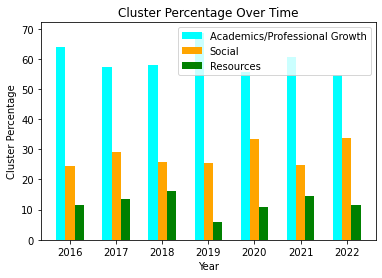

<Figure size 864x504 with 0 Axes>

In [696]:
# create data
x = np.arange(7)
y1 = academicpercentages
y2 = socialpercentages
y3 = resourcespercentages
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['2016', '2017', '2018', '2019', '2020','2021','2022'])
plt.xlabel("Year")
plt.ylabel("Cluster Percentage")
plt.legend(["Academics/Professional Growth", "Social", "Resources"])
plt.title('Cluster Percentage Over Time')
plt.figure(figsize=(12, 7))
plt.show()